### REGIÃO COLETADA

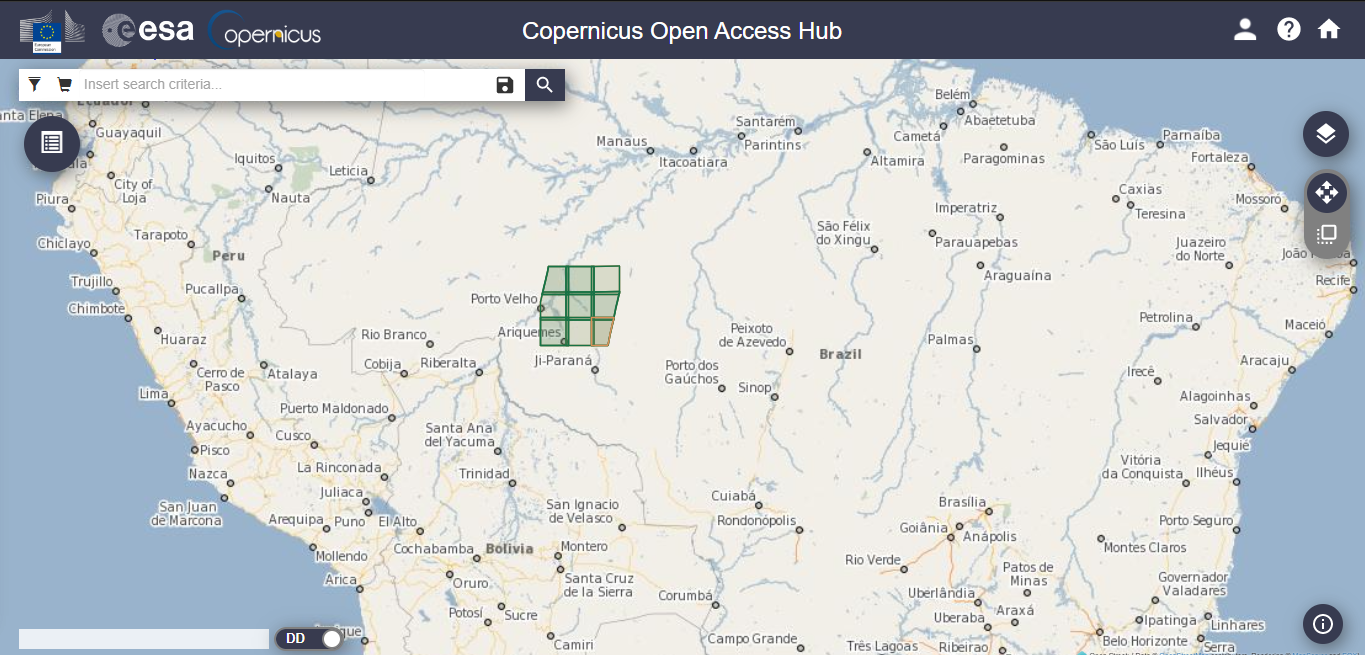

In [124]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [2]:
jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green 
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [3]:
jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green 
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [4]:
print(band4.count)
print(band4.width)
print(band4.height)
print(band4.dtypes)

1
1830
1830
('uint16',)


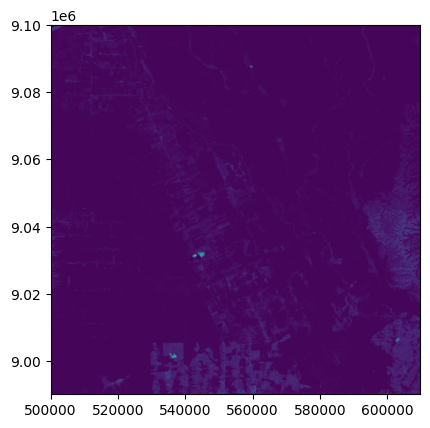

<AxesSubplot: >

In [5]:
plot.show(band4)

In [6]:
#converting a matriz array into a rasterio
band4.transform

Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 9100000.0)

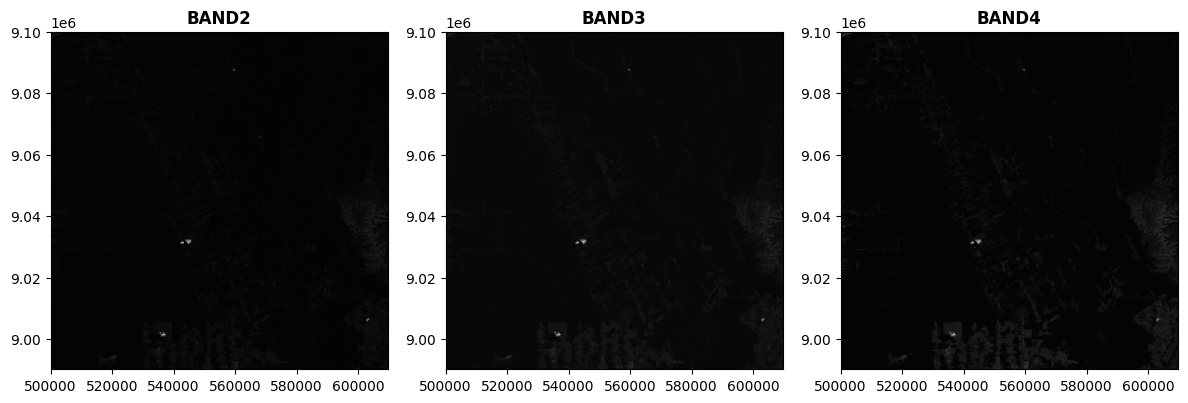

In [7]:
#different bands in colormap
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='gray', title='BAND2')
plot.show(band3, ax=ax2, cmap='gray', title='BAND3')
plot.show(band4, ax=ax3, cmap='gray', title='BAND4')
fig.tight_layout()

### Create NDVI 
Calculating Normalized Difference Vegetation Index (NDVI) is an important indicator to assess the presence/absence of green vegetation from the satellite images. To calculate the NDVI, you need Red band and Near-Infrared Band (NIR). Different satellite images assign different numbers for this band. Sentinel Images have red in 4th band and NIR in the 8th band. The formula for NDVI calculation is:
nir - red /(nir + red).

To carry out this in Rasterio we need first to read the 4th and 8th bands as arrays. We also need to make sure that the arrays are floats.

##### IMAGES JUL/2021

In [8]:
red = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [9]:
def ndvi_result(red_value, nir_value):
    return (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)

In [10]:
def ndvi_plot(red_value, nir_value):
    ndvi = (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)
    
    fig, ax = plt.subplots(1, figsize=(18, 18))
    return plot.show(ndvi)

In [11]:
ndvi_result(red, nir)

array([[[0.89815818, 0.89736701, 0.89374817, ..., 0.90206813,
         0.89448108, 0.87858347],
        [0.88078237, 0.89157631, 0.89598893, ..., 0.9069475 ,
         0.89048811, 0.89496718],
        [0.89419898, 0.88058806, 0.88017366, ..., 0.89835361,
         0.88443616, 0.89694149],
        ...,
        [0.87867759, 0.88440025, 0.88881356, ..., 0.7554559 ,
         0.65838926, 0.70205237],
        [0.88421386, 0.8902439 , 0.89047915, ..., 0.88138686,
         0.8746406 , 0.87764706],
        [0.887078  , 0.89013813, 0.88211788, ..., 0.8870411 ,
         0.88740741, 0.88871122]]])

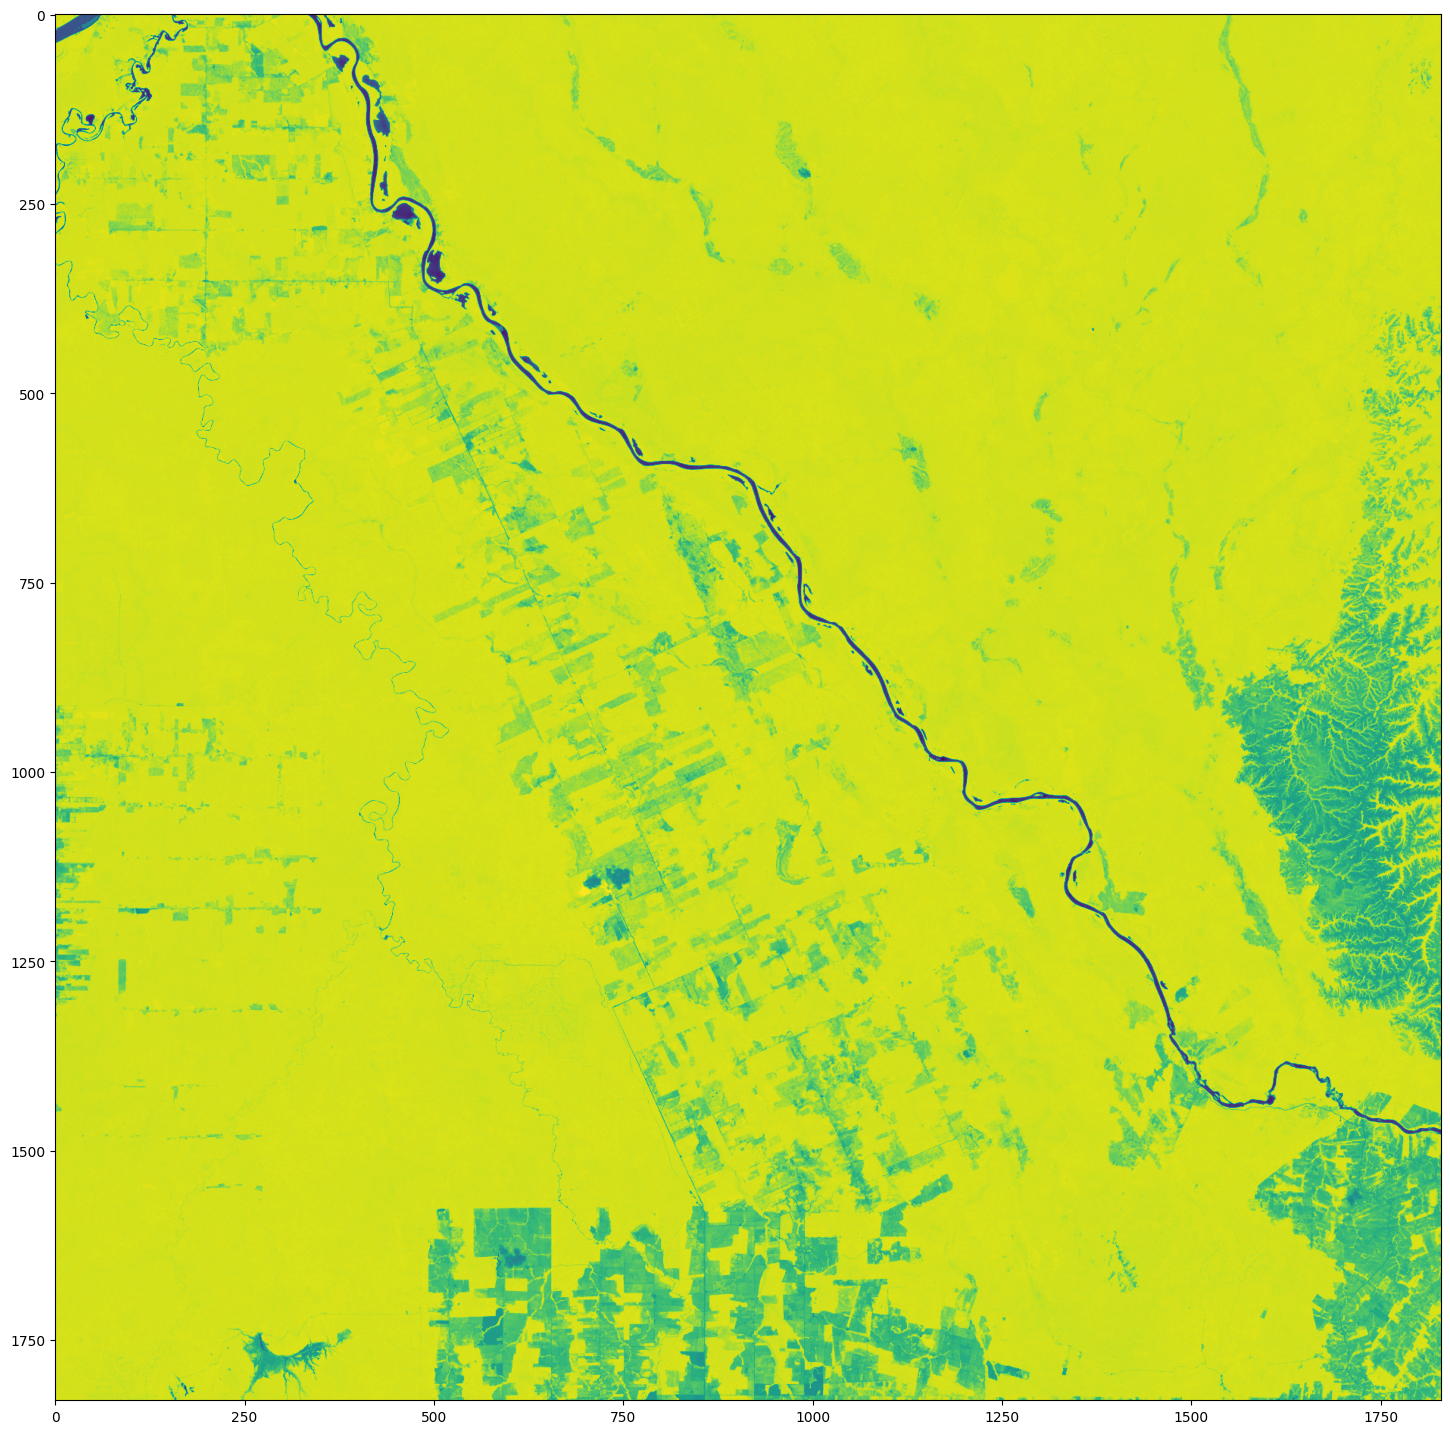

<AxesSubplot: >

In [12]:
ndvi_plot(red, nir)

##### IMAGES NOV/2022

In [13]:
nov_images_path = "./data/NOV2022/"
band2 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B02_60m.jp2', driver='JP2OpenJPEG') #green
band3 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [14]:
red_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [15]:
ndvi_result(red_nov, nir_nov)

array([[[0.59819141, 0.61800662, 0.60130816, ..., 0.59618233,
         0.56646579, 0.57574711],
        [0.59250868, 0.59830994, 0.61412175, ..., 0.57682884,
         0.5689415 , 0.58613728],
        [0.58889582, 0.57751331, 0.58431005, ..., 0.57426941,
         0.5546277 , 0.57720207],
        ...,
        [0.55548139, 0.57131346, 0.53893866, ..., 0.53030303,
         0.50974026, 0.48871182],
        [0.54832181, 0.54096141, 0.54896043, ..., 0.56292985,
         0.5610752 , 0.55789474],
        [0.54689851, 0.52397498, 0.5308255 , ..., 0.5679702 ,
         0.59076331, 0.55727821]]])

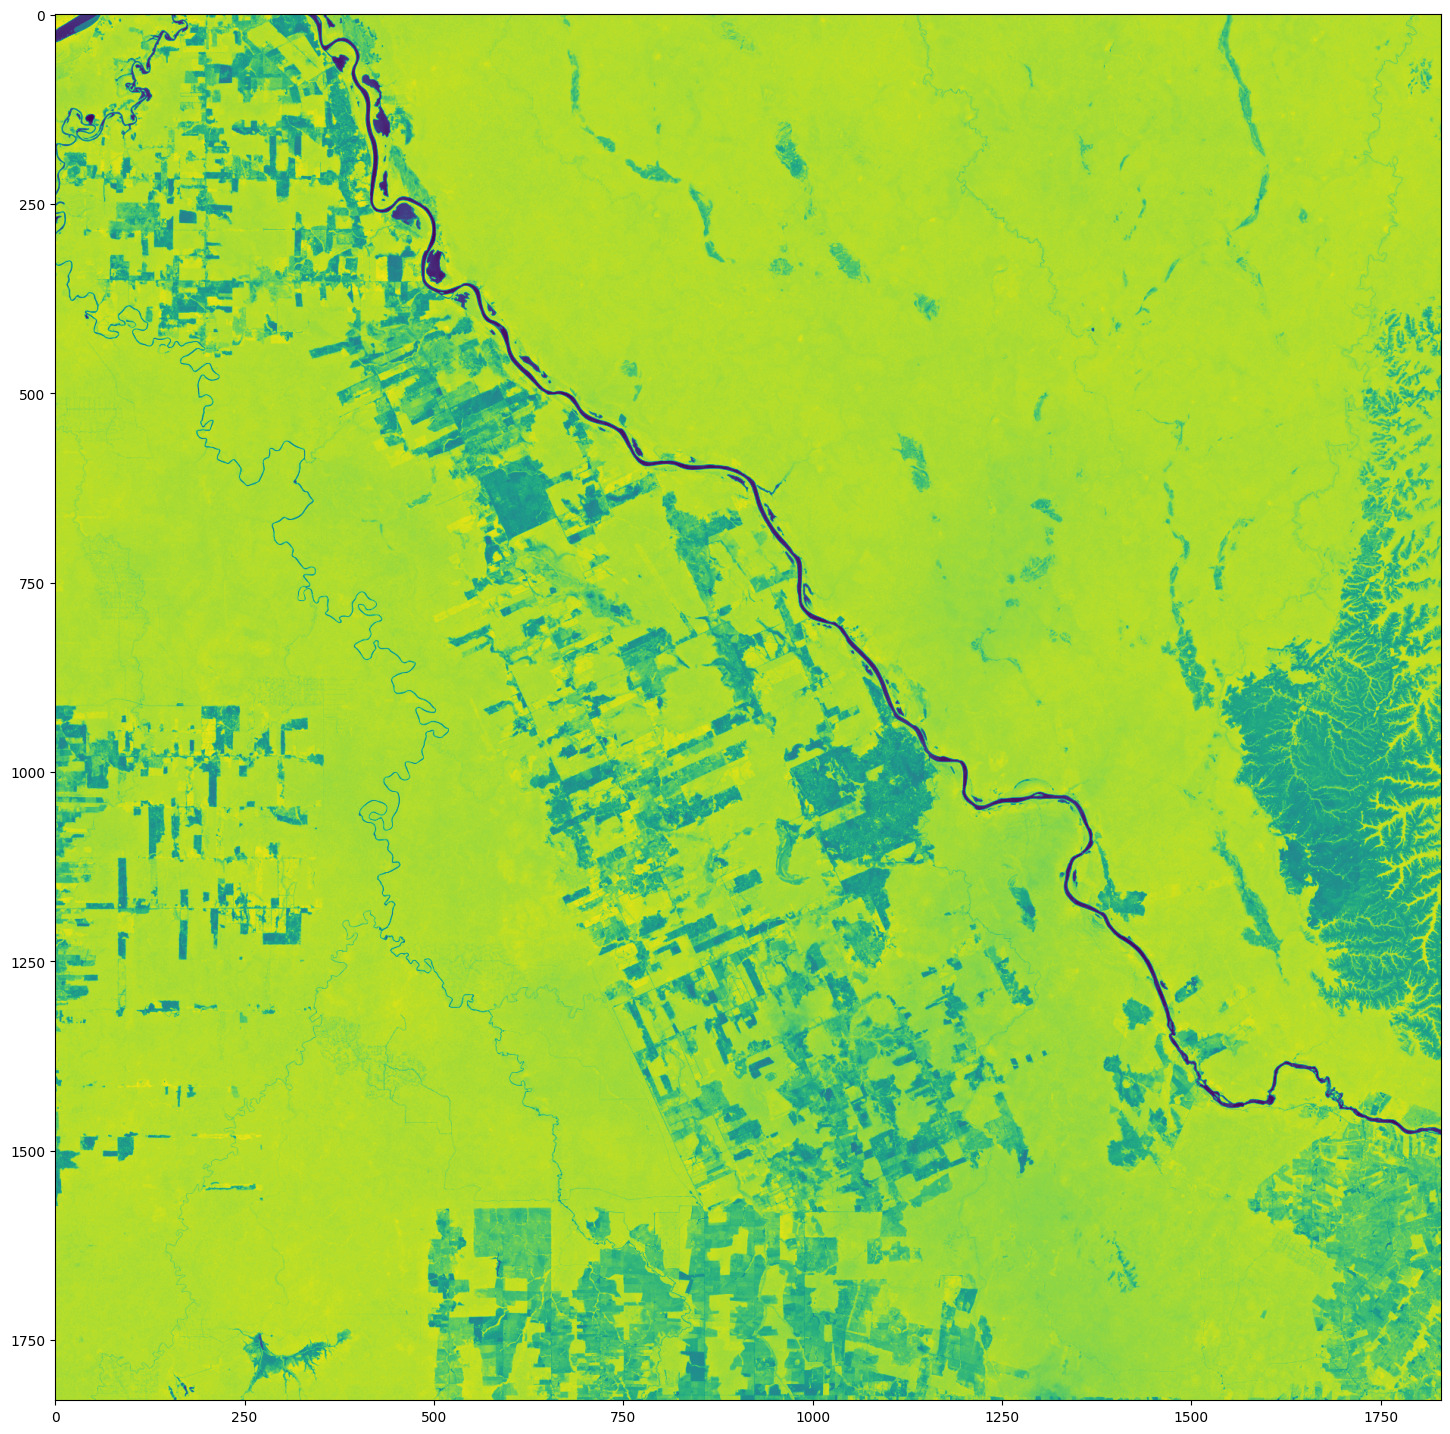

<AxesSubplot: >

In [16]:
ndvi_plot(red_nov, nir_nov)

### K-Means with OpenCV

O OpenCV fornece a função cv2.kmeans(amostras, nclusters(K), critérios, numero_tentativas, sinalizadores) para agrupamento de cores. 


Os critérios são definidos como tipo, número máximo de iterações e epsilon (precisão). 
Os tipos podem ser cv.TERM_CRITERIA_EPS (interrompe a iteração do algoritmo se a precisão especificada, epsilon, for atingida), 
cv.TERM_CRITERIA_MAX_ITER (interrompe o algoritmo após o número especificado de iterações, max_iter) ou as duas juntas (interrompe a iteração quando alguma das condições for atendida). 


Os sinalizadores podem ser cv.KMEANS_PP_CENTERS ou cv.KMEANS_RANDOM_CENTERS.

In [101]:
#reading the image
img2021 = cv2.imread('rasterio_imgs_kmeans\jul2021.jpg')
img2022 = cv2.imread('rasterio_imgs_kmeans/nov2022.jpg')

In [102]:
#change color to RGB
img2021 = cv2.cvtColor(img2021, cv2.COLOR_BGR2RGB)
img2022 = cv2.cvtColor(img2022, cv2.COLOR_BGR2RGB)

In [105]:
def plot_opencv_kmeans(img, n_clusters):
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    img = img.reshape((-1,3))

    # Convert to float type to use the algorithm 
    img = np.float32(img)

    #KMEANS
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = n_clusters
    retval, labels, centers = cv2.kmeans(img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert data into 8-bit values
    centers = np.uint8(centers)
    centers_segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = centers_segmented_data.reshape((img2021.shape))
    
    return plt.imshow(segmented_image)

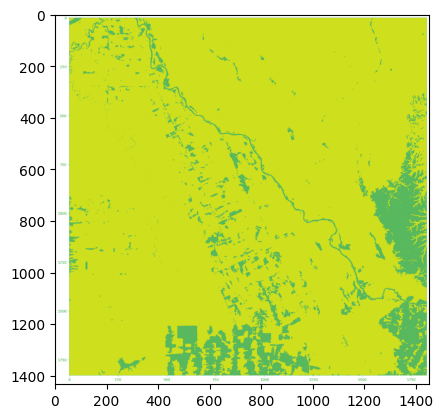

In [107]:
plot_opencv_kmeans(img2021, 3)

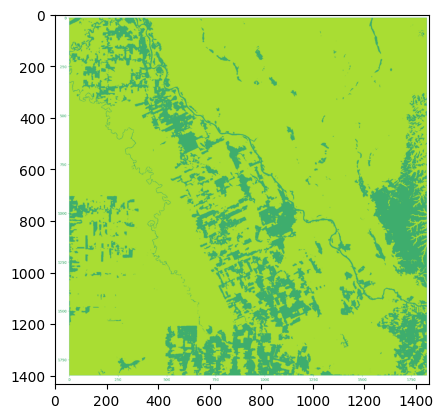

In [108]:
plot_opencv_kmeans(img2022, 3)

OBS: 

Both images (2021 and 2022) are pretty similar than the NDVI plot (without the algorithm). Basically, only the color of the      river is gone.

In other words, the NDVI plot image has 4 colors or something like that.

# RASCUNHO 


### ALGUMA IDEIA DE COMO TRAZER ESSA DIFERENÇA EM NÚMEROS?

In [132]:
################################ RASCUNHO ###########################################

In [125]:
def teste_plot_opencv_kmeans(img, n_clusters):
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    img = img.reshape((-1,3))

    # Convert to float type to use the algorithm 
    img = np.float32(img)

    #KMEANS
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = n_clusters
    retval, labels, centers = cv2.kmeans(img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert data into 8-bit values
    centers = np.uint8(centers)

    #df
    df = pd.DataFrame(data=centers[labels.flatten()], columns=['1', '2', '3'])
    return df

In [126]:
teste_plot_opencv_kmeans(img2021, 3)

1    2    3
0        254  254  254
1        254  254  254
2        254  254  254
3        254  254  254
4        254  254  254
...      ...  ...  ...
2079295  254  254  254
2079296  254  254  254
2079297  254  254  254
2079298  254  254  254
2079299  254  254  254

[2079300 rows x 3 columns]

In [131]:
teste_plot_opencv_kmeans(img2022, 3)['3'].unique()

array([254, 109,  51], dtype=uint8)